<a href="https://colab.research.google.com/github/dajebbar/AIPND/blob/main/Categorical_Plot_Practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# prerequisite package imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

plt.style.use('fivethirtyeight')
%matplotlib inline

from solutions_biv import categorical_solution_1

We'll continue to make use of the fuel economy dataset in this workspace.

In [ ]:
fuel_econ = pd.read_csv('./data/fuel_econ.csv')
fuel_econ.head()

,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,pv2,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,79,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4
1,32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,94,0,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6
2,32206,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,17.4935,21.2000,26.5716,35.1000,20.6716,429,5,5
3,32207,Volkswagen,CC 4motion,2013,Compact Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,16.9415,20.5000,25.2190,33.5000,19.8774,446,5,5
4,32208,Chevrolet,Malibu eAssist,2013,Midsize Cars,Front-Wheel Drive,Automatic (S6),Regular Gasoline,4,2.4,0,95,24.7726,31.9796,35.5340,51.8816,28.6813,310,8,8


**Task**: Use a plot to explore whether or not there differences in recommended fuel type depending on the vehicle class. Only investigate the difference between the two main fuel types found in the 'fuelType' variable: Regular Gasoline and Premium Gasoline. (The other fuel types represented in the dataset are of much lower frequency compared to the main two, that they'll be more distracting than informative.) **Note**: The dataset as provided does not retain any of the sorting of the 'VClass' variable, so you will also need to copy over any code you used previously to sort the category levels.

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Premium Gasoline'),
  Text(1, 0, 'Regular Gasoline'),
  Text(2, 0, 'Diesel'),
  Text(3, 0, 'Midgrade Gasoline'),
  Text(4, 0, 'Natural Gas')])

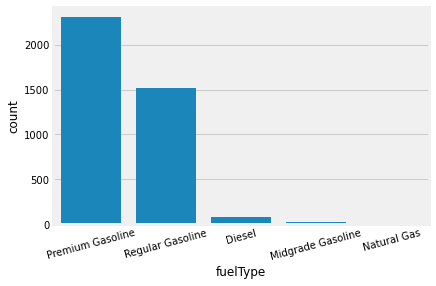

In [ ]:
#fuel_econ[['VClass', 'fuelType']].describe()
#fuel_econ['fuelType'].unique()
order_fuel = fuel_econ['fuelType'].value_counts().index
one_color = sb.color_palette()[0]

sb.countplot(data=fuel_econ, x='fuelType',
order=order_fuel, color=one_color);
plt.xticks(rotation=15)

In [ ]:
fuel_df = fuel_econ[['VClass', 'fuelType']]
print(fuel_df.shape)
fuel_df.head()

(3929, 2)


,VClass,fuelType
0,Subcompact Cars,Premium Gasoline
1,Compact Cars,Premium Gasoline
2,Compact Cars,Premium Gasoline
3,Compact Cars,Premium Gasoline
4,Midsize Cars,Regular Gasoline


In [ ]:
mask = ((fuel_df['fuelType'] == 'Premium Gasoline') | (fuel_df['fuelType'] == 'Regular Gasoline'))

fuel_df = fuel_df[mask]
print(fuel_df.shape)
fuel_df.head()

(3823, 2)


,VClass,fuelType
0,Subcompact Cars,Premium Gasoline
1,Compact Cars,Premium Gasoline
2,Compact Cars,Premium Gasoline
3,Compact Cars,Premium Gasoline
4,Midsize Cars,Regular Gasoline


In [ ]:
sedan_classes = ['Minicompact Cars', 'Subcompact Cars', 'Compact Cars', 'Midsize Cars', 'Large Cars']

vclasses = pd.api.types.CategoricalDtype(ordered = True, categories = sedan_classes)
fuel_df.loc[:,'VClass'] = fuel_df.loc[:,'VClass'].astype(vclasses)

In [ ]:
ct_counts = fuel_df.groupby(['VClass', 'fuelType']).size()
ct_counts

VClass            fuelType        
Minicompact Cars  Premium Gasoline    318
                  Regular Gasoline      3
Subcompact Cars   Premium Gasoline    534
                  Regular Gasoline    132
Compact Cars      Premium Gasoline    593
                  Regular Gasoline    490
Midsize Cars      Premium Gasoline    509
                  Regular Gasoline    640
Large Cars        Premium Gasoline    348
                  Regular Gasoline    256
dtype: int64

In [ ]:
ct_counts.reset_index(name='count')
ct_counts = ct_counts.unstack(level=-1)
ct_counts

fuelType,Premium Gasoline,Regular Gasoline
VClass,,
Minicompact Cars,318,3
Subcompact Cars,534,132
Compact Cars,593,490
Midsize Cars,509,640
Large Cars,348,256


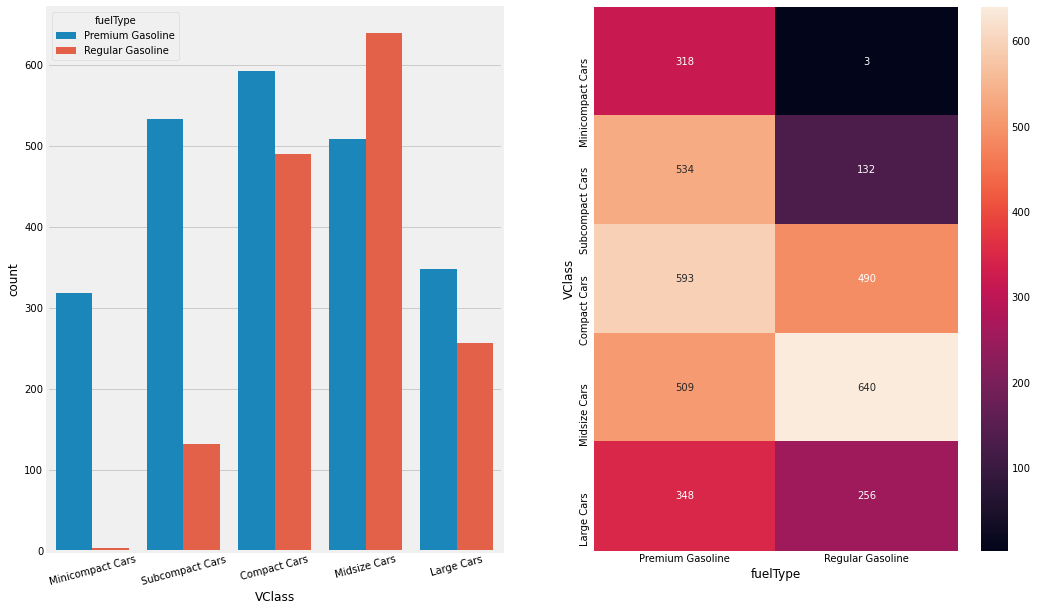

In [ ]:
plt.figure(figsize=[16, 10])

plt.subplot(1,2,1)
sb.countplot(data=fuel_df, x='VClass', hue='fuelType');
plt.xticks(rotation=15)

plt.subplot(1,2,2)
sb.heatmap(ct_counts, annot=True, fmt='d');

I chose a clustered bar chart instead of a heat map in this case since there weren't a lot of numbers to plot. If you chose a heat map, did you remember to add a color bar and include annotations? From this plot, you can see that more cars use premium gas over regular gas, and that the smaller cars are biased towards the premium gas grade. It is only in midsize sedans where regular gasoline was used in more cars than premium gasoline.


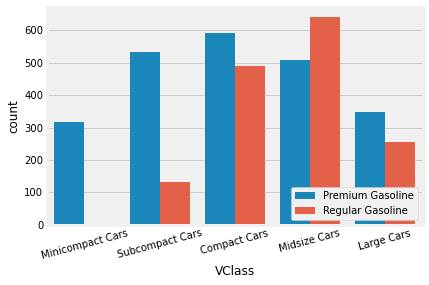

In [ ]:
# run this cell to check your work against ours
categorical_solution_1()